# Instability in a multistep method

Consider the ridiculously simple IVP $u'=u$, $u(0)=1$, whose solution is $e^t$.

In [1]:
dudt = (u,t) -> u;
u_exact = exp;
a = 0.0;  b = 1.0;

Let's apply the LIAF method to this problem for varying fixed step sizes. We'll measure the error at the time $t=1$.

In [2]:
n = [5,10,20,40,60]
err = zeros(size(n))
t = [];  u = [];
for (j,n) = enumerate(n)
    h = (b-a)/n
    t = [ a + i*h for i=0:n ]
    u = [1; u_exact(h); zeros(n-1)];
    f = [dudt(u[1],t[1]); zeros(n)];
    for i = 2:n
        f[i] = dudt(u[i],t[i])
        u[i+1] = -4*u[i] + 5*u[i-1] + h*(4*f[i]+2*f[i-1])
    end
    err[j] = abs(u_exact(b) - u[end])
end

using DataFrames
DataFrame(n=n,h=(b-a)./n,error=err)

,n,h,error
,Int64,Float64,Float64
1,5,0.2,0.0160452
2,10,0.1,2.84548
3,20,0.05,1.6225e6
4,40,0.025,9.3442e18
5,60,0.0166667,1.74013e32


The error starts out promisingly, but things explode from there. A graph of the last numerical attempt yields a clue.

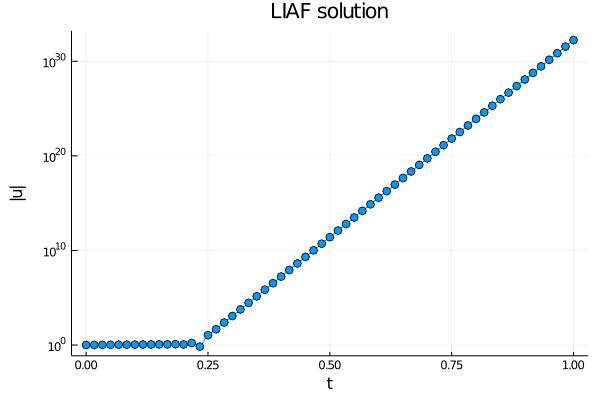

In [3]:
using Plots
plot(t,abs.(u),m=:o,label="",
    xlabel="t",yaxis=(:log10,"|u|"),title="LIAF solution")

It's clear that the solution is growing exponentially in time.